In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


!wget https://storage.googleapis.com/plantdata/PlantVillage.zip

--2022-05-04 04:11:40--  https://storage.googleapis.com/plantdata/PlantVillage.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856839084 (817M) [application/x-zip-compressed]
Saving to: ‘PlantVillage.zip’

PlantVillage.zip    100%[===================>] 817.14M   143MB/s    in 5.8s    

2022-05-04 04:11:46 (141 MB/s) - ‘PlantVillage.zip’ saved [856839084/856839084]



In [ ]:
!unzip PlantVillage.zip;

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/validation/Soybean___healthy/55ed6b1f-9baf-45d9-b4b4-4f19c7dc271a___RS_HL 7312.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/561d3eaf-4ff0-4580-9958-55494bf3a88b___RS_HL 6420.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/56486310-1cd5-4fb4-9fb8-01f60417f64f___RS_HL 6258.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/56a8722c-1acf-4f63-ba8c-66df35f47791___RS_HL 6311.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/5735f9f8-b5a4-42b4-b093-1e323323dfa2___RS_HL 3224.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/5755b898-21db-4c7f-8d5a-3401e8478192___RS_HL 4530.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/578f7dd6-55ae-4fb3-8f79-3ee460250ea7___RS_HL 2784.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/57afa416-2cfd-49d0-9674-e59b7955648c___RS_HL 3367.JPG  
  inflating: PlantVillage/validation/Soybean___healthy/57bac1

In [ ]:
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np

import os                       
import numpy as np            
import pandas as pd             
import torch                    
import matplotlib.pyplot as plt 
import torch.nn as nn           
from torch.utils.data import DataLoader  
from PIL import Image      
import torch.nn.functional as F 
import torchvision.transforms as transforms    
from torchvision.utils import make_grid       
from torchvision.datasets import ImageFolder  
from torchsummary import summary   
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
TRAIN_DATA_PATH = "/content/PlantVillage/train"
TEST_DATA_PATH = "/content/PlantVillage/validation"



TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)

test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)

In [ ]:
import copy

In [ ]:
batch_size = 16
n_iters = 130


num_epochs = 5

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=True)

In [ ]:
num_classes = 38

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0)))  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

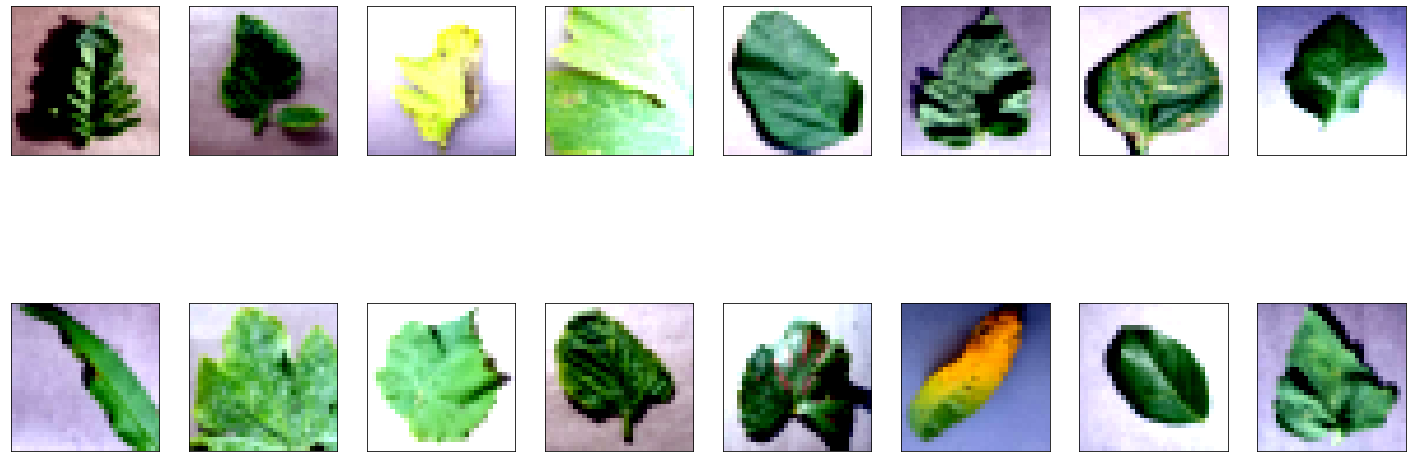

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() 
fig = plt.figure(figsize=(25, 10))
# display 20 images
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
   

In [ ]:
import copy
from torchvision import models

In [ ]:
vgg = models.vgg16_bn()
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)
vgg = models.vgg16_bn(pretrained=True)
for param in vgg.parameters():
    param.requires_grad = False
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=38, bias=True)]
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

torch.Size([38, 4096])
torch.Size([38])


In [ ]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
resnet18.fc.out_features = 38
print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torchvision.models as models
resnet50 = models.resnet50(pretrained=True)
resnet50.fc.out_features = 38
print(resnet50)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
def zero():
        return vgg
def one():
        return resnet18
def two():
        return resnet50

In [ ]:
def indirect(i):
        switcher={
                0:zero,
                1:one,
                2:two
                }
        func=switcher.get(i)
        return func()

In [ ]:
u=indirect(1)
print(u)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def model__(u):
  if u==vgg:
    return vgg
  if u==resnet50:
    return resnet50
  else:
    return resnet18

In [ ]:
models_pre=model__(u)
type(models_pre)

torchvision.models.resnet.ResNet

In [ ]:
models_pre = models_pre.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(models_pre.parameters(), lr=0.1)

In [ ]:
loss_epoch_arr = []
max_epochs = 4
train_acc = []
test_acc = []

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = models_pre(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    train_loss += loss.item()
    train_loss = train_loss/len(train_loader.dataset)
    train_acc.append(train_loss)
  for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = models_pre(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    test_loss += loss.item()
    test_loss = test_loss/len(test_loader.dataset)
    test_acc.append(test_loss)

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(models_pre.state_dict())
      print('Min loss %0.2f' % min_loss)
    if i % 100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
    del inputs, labels, outputs
    torch.cuda.empty_cache()
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(test_loader, models_pre), evaluation(train_loader, models_pre)))
    
    
#plt.plot(loss_epoch_arr)
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.show()


    

Min loss 4.23
Iteration: 0/3125, Loss: 4.23
Min loss 1.25
Min loss 1.23
Min loss 1.22
Min loss 0.98
Iteration: 100/3125, Loss: 1.52
Min loss 0.89
Min loss 0.81
Iteration: 200/3125, Loss: 1.19
Min loss 0.75
Iteration: 300/3125, Loss: 1.99
Min loss 0.69
Iteration: 400/3125, Loss: 1.87
Iteration: 500/3125, Loss: 1.39
Min loss 0.55
Iteration: 600/3125, Loss: 1.49
Epoch: 0/4, Test acc: 56.50, Train acc: 56.17
Iteration: 0/3125, Loss: 2.50
Min loss 0.51
Iteration: 100/3125, Loss: 1.46
Min loss 0.48
Min loss 0.45
Min loss 0.44
Iteration: 200/3125, Loss: 1.33
Min loss 0.38
Iteration: 300/3125, Loss: 1.55
Min loss 0.26
Iteration: 400/3125, Loss: 1.14
Iteration: 500/3125, Loss: 0.84
Iteration: 600/3125, Loss: 0.61
Epoch: 1/4, Test acc: 74.16, Train acc: 73.12
Iteration: 0/3125, Loss: 1.31
Min loss 0.22
Min loss 0.17
Iteration: 100/3125, Loss: 0.54
Min loss 0.13
Iteration: 200/3125, Loss: 1.16
Iteration: 300/3125, Loss: 1.21
Iteration: 400/3125, Loss: 0.66
Iteration: 500/3125, Loss: 0.67
Min loss

In [ ]:

def get_default_device():
    
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")
def to_device(data, device):
    
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)



In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [ ]:
test_images = sorted(os.listdir(test_dir + '/testpalnts')) # since images in test folder are in alphabetical order
test_images

['00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG',
 '00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG',
 '00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG',
 '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG',
 '0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG',
 '0a2726e0-3358-4a46-b6dc-563a5a9f2bdf___RS_Erly.B 7860.JPG',
 '0a3f2927-4410-46a3-bfda-5f4769a5aaf8___JR_HL 8275.JPG',
 '0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG',
 '0a9cfb27-280e-475a-bbb4-8eeaeff38b8c___NREC_B.Spot 9177.JPG',
 '0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG',
 '0abffc81-6be8-4b17-a83c-4d2830e30382___JR_B.Spot 9076.JPG',
 '0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG',
 '0ade14b6-8937-43ea-93eb-98343af6bae7___JR_HL 8026.JPG',
 '0ae44a6c-1213-4312-a11b-c7c5d4e585d0___RS_Erly.B 9442.JPG',
 '0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG',
 '0b27c03f-b3bc-4d96-9b76-6fbd779404b9___NREC_B.Spot 1799.JPG',
 '0b2bdc8e-90fd-4bb4

In [ ]:
def predict_image(img, model):
  
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)

    return train_data.classes[preds[0].item()]

Label: 0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG , Predicted: Tomato___Late_blight


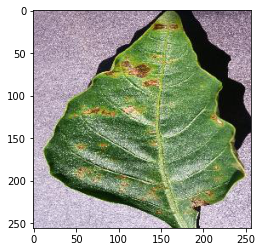

In [ ]:
img, label = test[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[9], ', Predicted:', predict_image(img, (models_pre)))